Anugra Salaza_5026201003


# SVR

Melakukan Import CSV

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DailyTemps.csv to DailyTemps.csv


Import Library

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, mean_absolute_error

Melakukan Load dataset dan membuat dataframe dengan nama dtemps

In [ ]:
# Load the dataset
dtemps = pd.read_csv('DailyTemps.csv')

Melakukan pengecekan dframe dtemps

In [ ]:
dtemps.head(10)

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758
5,1/6/2014,22.0,39.0,31.0,658,1759
6,1/7/2014,28.0,45.0,37.0,658,1759
7,1/8/2014,30.0,41.0,36.0,659,1800
8,1/9/2014,29.0,42.0,36.0,659,1801
9,1/10/2014,30.0,47.0,39.0,659,1801


In [ ]:
dtemps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1825 non-null   object 
 1   MinTemp  1821 non-null   float64
 2   MaxTemp  1821 non-null   float64
 3   AvgTemp  1821 non-null   float64
 4   Sunrise  1825 non-null   int64  
 5   Sunset   1825 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 85.7+ KB


Isi Nilai NaN

In [ ]:
dtemps = dtemps.fillna(method='ffill')

Membatasi atau memotong dframe dtemps supaya hanya menyertakan sejumlah 600 sampel

In [ ]:
# Keep a certain number of samples
num_samples_to_keep = 600
dtemps = dtemps.head(num_samples_to_keep)

In [ ]:
# Dropping columns ['MinTemp', 'MaxTemp', 'Sunrise', 'Sunset'] dan membuat dataframe baru
dtemps2 = dtemps.drop(columns=['MinTemp','MaxTemp','Sunrise','Sunset'])

# Renaming columns '['DATE', 'AvgTemp']'
dtemps2.rename(columns={'AvgTemp': 'Rataan', 'DATE': 'Periode'}, inplace=True)

In [ ]:
dtemps2.head()

,Periode,Rataan
0,1/1/2014,40.0
1,1/2/2014,43.0
2,1/3/2014,41.0
3,1/4/2014,37.0
4,1/5/2014,31.0


In [ ]:
dtemps2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Periode  600 non-null    object 
 1   Rataan   600 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.5+ KB


Mengkonversi kolom 'Periode' dalam DataFrame DailyTemps2 menjadi tipe data datetime

In [ ]:
# Converting 'DATE' column to datetime format
dtemps2['Periode'] = pd.to_datetime(dtemps2['Periode'], format='%m/%d/%Y')
dtemps2.head()

,Periode,Rataan
0,2014-01-01,40.0
1,2014-01-02,43.0
2,2014-01-03,41.0
3,2014-01-04,37.0
4,2014-01-05,31.0


Melakukan pengecekan plot pada Data frame DailyTemps2

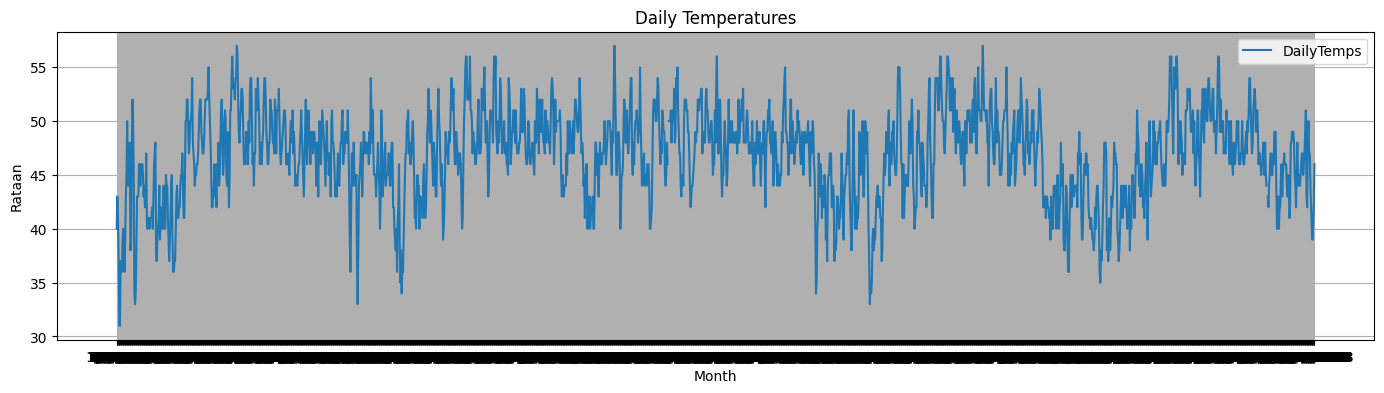

In [ ]:
#Plot
plt.figure(figsize=(17, 4))
plt.plot(DailyTemps2['Periode'], DailyTemps2['Rataan'], label='DailyTemps')  # Use the datetime index
plt.grid()
plt.xlabel('Month')
plt.ylabel('Rataan')
plt.legend()
plt.title('Daily Temperatures')
plt.show()

Mengacak urutan indeks dari DataFrame DailyTemps2 dan melakukan splitting feature dan target variabel

In [ ]:
# Shuffle the dataset
indices = shuffle(dtemps2.index, random_state=1)

Membuat dua variabel X dan y yang berisi data yang dipilih dari DataFrame DailyTemps2. Variabel X berisi Periode dan variabel y berisi nilai rata-rata temperatur yang sesuai.

In [ ]:
# Splitting features and target variable
X, y = dtemps2[['Periode']].iloc[indices], dtemps2['Rataan'].iloc[indices]

Melakukan Splitting Data Train dan Data Test dengan pembagian 80% dan 20%

In [ ]:
# Assuming 80-20 train-test split=
dtemps2_train = int(0.8 * len(y))
X_train, y_train = X.iloc[:dtemps2_train], y.iloc[:dtemps2_train]
X_test, y_test = X.iloc[dtemps2_train:], y.iloc[dtemps2_train:]

Menampilkan panjang (jumlah baris) X_train, X_test, y_train, y_test. Output yang dihasilkan  berguna untuk memahami seberapa besar ukuran setiap set data

In [ ]:
# Display results
lengths = {
    'X_train': len(X_train),
    'y_train': len(y_train),
    'X_test': len(X_test),
    'y_test': len(y_test)
}

# Convert lengths to a Pandas DataFrame
lengths_df = pd.DataFrame.from_dict(lengths, orient='index', columns=['Length'])

print(lengths_df)


         Length
X_train     480
y_train     480
X_test      120
y_test      120


Mengubah nilai input menjadi 2d untuk memenuhi persyaratan format yang diterima oleh model Support Vector Regression (SVR). Hal ini dilakukan karena model SVR biasanya mengharapkan input dalam bentuk matriks dua dimensi. Selanjutnya adalah pembuatan model Support Vector Regression (SVR). Kernel yang digunakan adalah Radial Basis Function (kernel='rbf') karena ketika menggunakan kernel = linear tidak terjadi persebaran data Actual vs Predicted. Hal ini mungkin bisa terjadi karena kernel = linear mungkin tidak menangkap hubungan antara fitur dan variabel target dengan baik. Sehingga perlu diubah parameternya

In [ ]:
#Mengubah nilai input menjadi 2d
X_train_2d = X_train.values.reshape(-1, 1)
X_test_2d = X_test['Periode'].values.reshape(-1,1)

# Create SVR model
regressor = SVR(kernel='rbf', C=1.0, epsilon=0.1)

In [ ]:
# Fit the SVR model
regressor.fit(X_train_2d, y_train)

SVR()

Melakukan prediksi dengan model SVR


In [ ]:
# Predict
y_pred = regressor.predict(X_test_2d)

**Plot Data Actual dan Prediction**

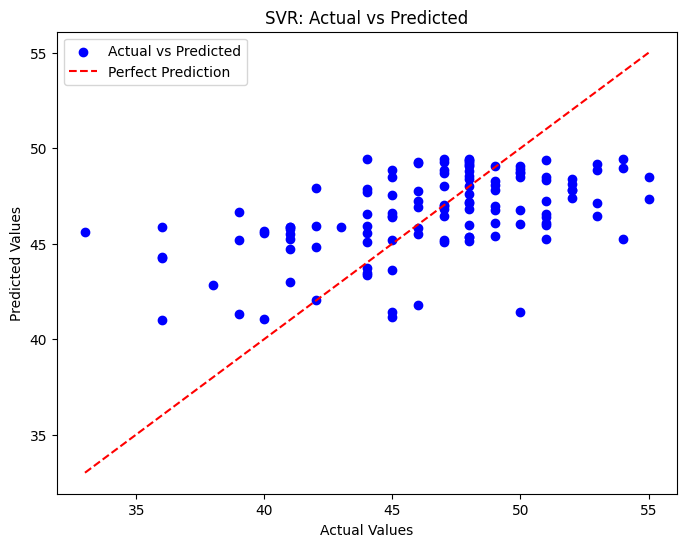

In [ ]:

# Scatter plot to visualize predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
# Plotting the diagonal line (perfect prediction)
max_value = max(max(y_test), max(y_pred))
min_value = min(min(y_test), min(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Perfect Prediction')

plt.title('SVR: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()


Mencari NIlai MSE, MAE, dan RMSE

In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
print("MSE = ", round(sm.mean_squared_error(y_test, y_pred), 2))
print("MAE = ", round(sm.mean_absolute_error(y_test, y_pred), 2))
print("RMSE = ", np.sqrt(mean_squared_error(y_test, y_pred)).round(2))

MSE =  14.7
MAE =  3.02
RMSE =  3.83


# ARIMA

Import LIbrary

In [ ]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import itertools
from sklearn.metrics import mean_squared_error

Membaca dataset dan membuat dataframe Arimatemps

In [ ]:
# Load the dataset
dtempsarima = pd.read_csv('DailyTemps.csv')
dtempsarima.head(10)


,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758
5,1/6/2014,22.0,39.0,31.0,658,1759
6,1/7/2014,28.0,45.0,37.0,658,1759
7,1/8/2014,30.0,41.0,36.0,659,1800
8,1/9/2014,29.0,42.0,36.0,659,1801
9,1/10/2014,30.0,47.0,39.0,659,1801


Isi NIlai NaN

In [ ]:
dtempsarima = dtempsarima.fillna(method='ffill')

Membatasi atau memotong dataset DailyTemps supaya hanya menyertakan sejumlah 500 sampel

In [ ]:
# Keep a certain number of samples
num_samples_to_keep = 600
dtempsarima = dtempsarima.head(num_samples_to_keep)

In [ ]:
dtempsarima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     600 non-null    object 
 1   MinTemp  600 non-null    float64
 2   MaxTemp  600 non-null    float64
 3   AvgTemp  600 non-null    float64
 4   Sunrise  600 non-null    int64  
 5   Sunset   600 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 28.2+ KB


In [ ]:
dtempsarima.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


Mengubah nama kolom dan tipe kolom 'periode' menjadi tipe data datetime

In [ ]:
# Change to DateTime + index
dtempsarima.columns = ['Periode','Minimal','Maximal','Rataan','Sunrise','Sunset']
dtempsarima['Periode'] = pd.to_datetime(dtempsarima['Periode'], format='%m/%d/%Y')
dtempsarima = dtempsarima.set_index('Periode')

In [ ]:
dtempsarima.head()

,Minimal,Maximal,Rataan,Sunrise,Sunset
Periode,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


Visualisasi Data Actual

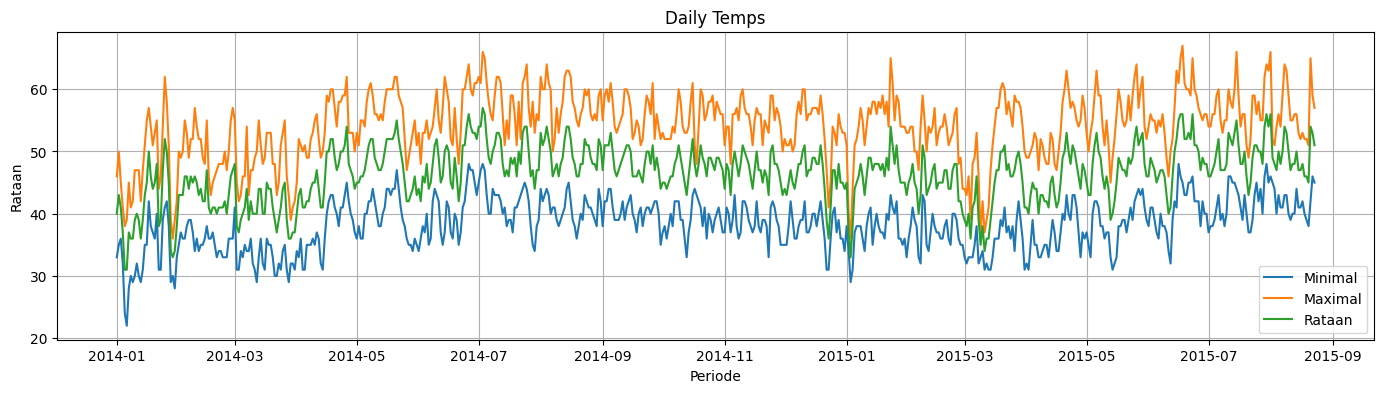

In [ ]:

plt.figure(figsize=(17, 4))

# Plot each line separately
plt.plot(dtempsarima.index, dtempsarima['Minimal'], label='Minimal')
plt.plot(dtempsarima.index, dtempsarima['Maximal'], label='Maximal')
plt.plot(dtempsarima.index, dtempsarima['Rataan'], label='Rataan')

plt.grid()
plt.xlabel('Periode')
plt.ylabel('Rataan')
plt.legend()
plt.title('Daily Temps')
plt.show()

adf_test digunakan untuk melakukan uji Augmented Dickey-Fuller (ADF) pada suatu data deret waktu. Uji Augmented Dickey-Fuller (ADF) adalah salah satu metode pengujian untuk menentukan apakah suatu deret waktu bersifat stasioner atau tidak.

In [ ]:
# JANGAN DIGANTI
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis, Data is non-stationary ")

In [ ]:
print(adfuller(dtempsarima['Rataan']))

(-5.065450075802053, 1.6443811465065093e-05, 6, 593, {'1%': -3.4414256033746606, '5%': -2.8664262627821473, '10%': -2.569372254520843}, 2707.6312482878147)


In [ ]:
# hasil test ADF
adf_test(dtempsarima['Rataan'])

ADF Statistics: -5.065450075802053
p- value: 1.6443811465065093e-05
strong evidence against the null hypothesis, reject the null hypothesis. Data is stationary


Karena nilai P-value kurang dari 0.05 maka tidak perlu melakukan differencing dan datanya telah stasioner

**Manual ARIMA**

Menampilkan Plot ACF dan PACF

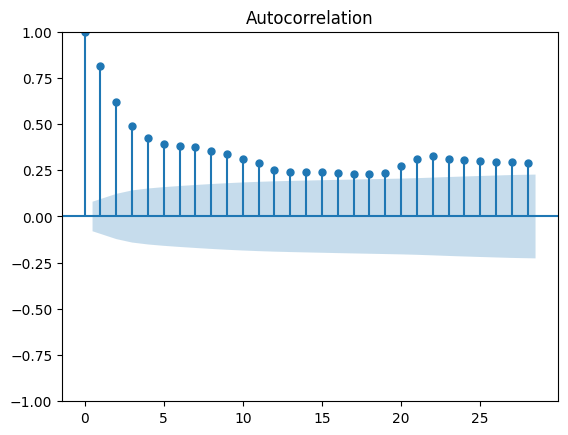

In [ ]:
# Plot ACF
acf = plot_acf(dtempsarima['Rataan'].dropna())

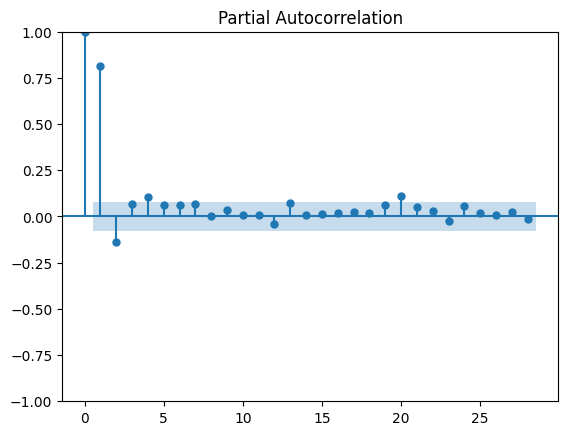

In [ ]:
# Plot PACF
pacf = plot_pacf(dtempsarima['Rataan'].dropna())

Membagi dataset menjadi data train dan test dengan proporsi 80%-20% dari sample yang dikeep

In [ ]:
# Split Dataset
train_len = 480 #Mengambil 80% dari sample yang dikeep
train_data = dtempsarima[0:train_len]
test_data = dtempsarima[train_len:]

In [ ]:
# Inisialisasi tanggal awal dan akhir prediksi
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [ ]:
train_data.head()

,Minimal,Maximal,Rataan,Sunrise,Sunset
Periode,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


Melakukan Inisialisasi Model Arima. Dari Plot ACF dan PACF, dapat dilihat jika ACF lag yang paling jauh adalah nilai 1 dan PACF Lag yang paling jauh juga bernilai 1 sehingga untuk penentuan order adalag (1,0,1).

In [ ]:
# Inisialisasi Model ARIMA

model_ARIMA = ARIMA(train_data['Rataan'],order=(1,0,1)) # (order= pacf(p), difference(d), acf(q))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


melatih (fit) model ARIMA

In [ ]:
# Train model ARIMA
model_Arima_fit=model_ARIMA.fit()

In [ ]:
# Summary Model ARIMA
print(model_Arima_fit.summary())

#Pilih z yang paling kecil dan juga tidak memiliki nilai minus

                               SARIMAX Results                                
Dep. Variable:                 Rataan   No. Observations:                  480
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1130.065
Date:                Mon, 04 Dec 2023   AIC                           2268.130
Time:                        15:17:35   BIC                           2284.825
Sample:                    01-01-2014   HQIC                          2274.692
                         - 04-25-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.9288      0.587     78.235      0.000      44.778      47.079
ar.L1          0.7614      0.037     20.797      0.000       0.690       0.833
ma.L1          0.1784      0.050      3.565      0.0

Melakukan prediksi dengan model Arima

In [ ]:
# Lakukan Prediksi
pred = model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)

In [ ]:
# Simpan Prediksi di dataFrame
test_data['Predicted_ARIMA'] = pred

<ipython-input-54-35f2555093bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA'] = pred


Visualisasi Actual dan forecasting

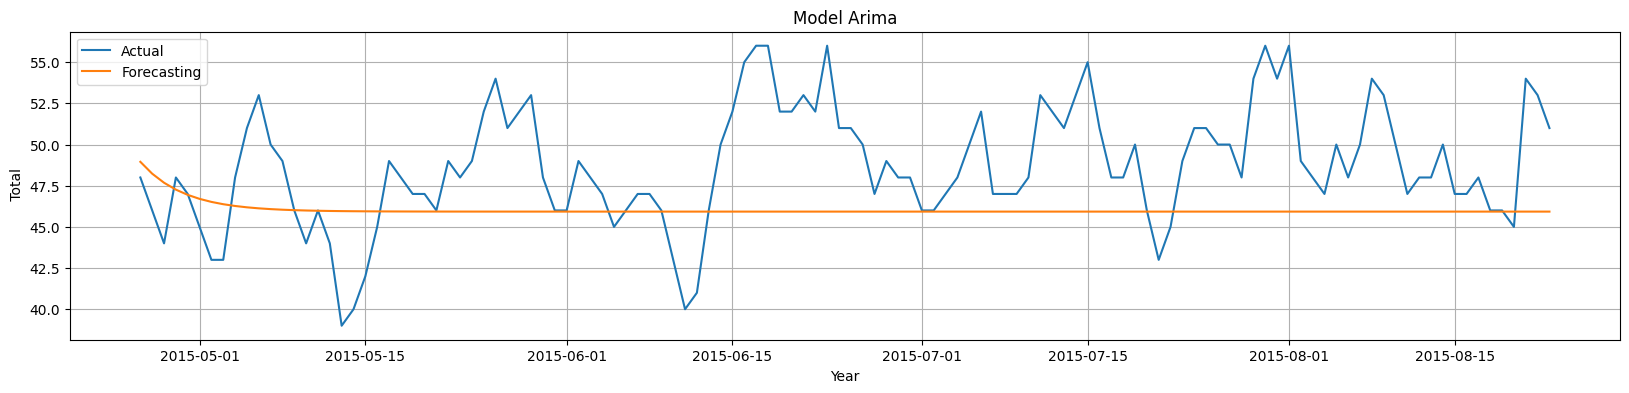

In [ ]:
# Plot Perbandingan ARIMA dan Actual Data
plt.figure(figsize=(20, 4))
plt.plot(test_data['Rataan'], label='Actual')
plt.plot(test_data['Predicted_ARIMA'], label='Forecasting')
plt.grid()
plt.xlabel('Year')
plt.ylabel(" Total")
plt.legend()
plt.title('Model Arima')
plt.show()

**PMD ARIMA - Auto Parameter Arima**

Menentukan best model arima

In [ ]:
import pmdarima as pm

model = pm.auto_arima(dtempsarima['Rataan'], start_p=1, start_q=1, d=0,
                      suppress_warnings=True,
                      trace=True,
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2823.732, Time=1.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3497.729, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2834.592, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3078.124, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6317.321, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2825.682, Time=1.85 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2825.571, Time=1.73 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2922.985, Time=0.53 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2825.048, Time=0.43 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2820.551, Time=2.55 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2818.329, Time=3.64 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2814.924, Time=2.48 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2823.810, Time=0.92 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=2814.634, Time=1.59 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept

Membuat dan Melatih Model Arima

In [ ]:
model_pmdArima=ARIMA(train_data['Rataan'],order=(4,0,1))
model_pmdArima_fit=model_pmdArima.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Melakukan prediction

In [ ]:
pred=model_pmdArima_fit.predict(start=pred_start_date,end=pred_end_date)
test_data['PMD_Arima'] = pred

<ipython-input-47-b1474064c026>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['PMD_Arima'] = pred


Visualisasi

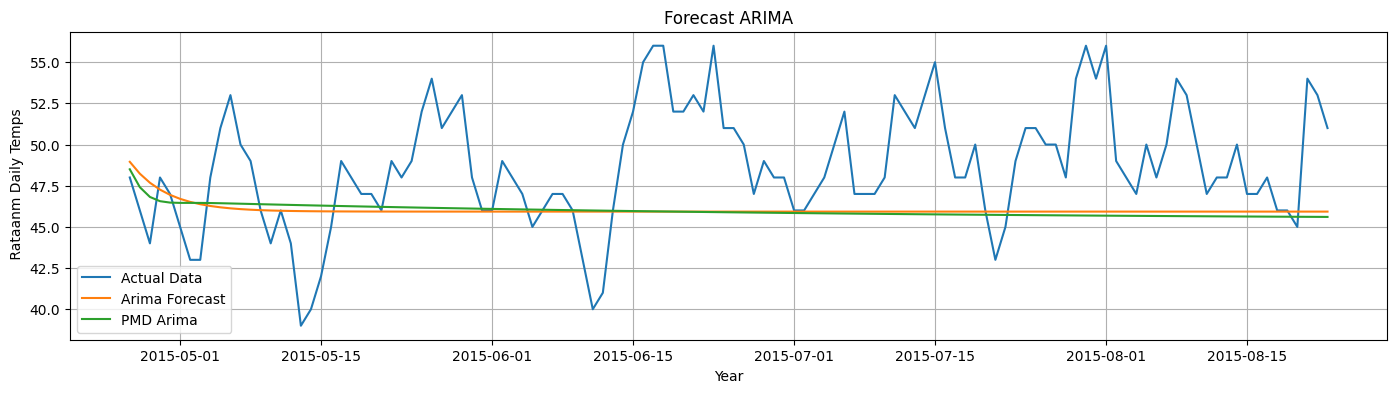

In [ ]:
# Plot the time series DMA
plt.figure(figsize=(17, 4))
plt.plot(test_data['Rataan'], label='Actual Data')
plt.plot(test_data['Predicted_ARIMA'], label='Arima Forecast')
plt.plot(test_data['PMD_Arima'], label='PMD Arima')
plt.grid()
plt.xlabel('Year')
plt.ylabel(" Rataanm Daily Temps")
plt.legend()
plt.title('Forecast ARIMA')
plt.show()

Membandingkan Nilai RMSE dan MAPE pada saat manual ARIMA dan PMD ARIMA

In [ ]:
#Calculate RMSE and MAPE
from sklearn.metrics import mean_squared_error
rmse_manual_arima = np.sqrt(mean_squared_error(test_data['Rataan'], test_data['Predicted_ARIMA'])).round(2)
mape_manual_arima  = np.round(np.mean(np.abs(test_data['Rataan']- test_data['Predicted_ARIMA'])/test_data['Rataan'])*100,2)

rmse_pmd_arima = np.sqrt(mean_squared_error(test_data['Rataan'], test_data['PMD_Arima'])).round(2)
mape_pmd_arima  = np.round(np.mean(np.abs(test_data['Rataan']- test_data['PMD_Arima'])/test_data['Rataan'])*100,2)

results = pd.DataFrame({'Method':['Manual ARIMA', 'PMD ARIMA'], 'MAPE': [mape_manual_arima,mape_pmd_arima ], 'RMSE': [rmse_manual_arima, rmse_pmd_arima]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Manual ARIMA,4.38,8.27
1,PMD ARIMA,4.27,8.05


**Kesimpulan**
Dilihat hasil dari Manual Arima dan PMD Arima dapat disimpulkan, model Arima kurang cocok digunakan pada dataset DailyTemps hal ini ditunjukkan dengan plot Actual Vs Forecastinng pada manual Arima dan PMD Arima yang menunjukkan garis yang stasioner